# Data Cleaning

## Step-1: Import Libraries

### Import the necessary base libraries

In [1]:
import numpy as np
import pandas as pd

### Import visualization libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import the general custom functions

In [3]:
# import general custom data preprocessing functions
from General_Custom_Functions import *
General_Custom_Functions()


    Available General Custom Functions: 

    Check_Missing_Values(input_dataset)
    Trim_Dataset(input_dataset)
    Check_Feature_Details(input_dataset, input_feature)
    Check_Correlation(input_dataset, input_feature_list)
    Check_Multicollinearity(input_dataset, input_feature_list)
    Create_Dummy_Variables(input_dataset, input_feature_list)
    Create_Feature_Selected_Dataset(input_dataset)

    


### Import the specific custom functions

In [4]:
# import specific custom data preprocessing functions
from Specific_Custom_Functions import *
Specific_Custom_Functions()


    Available Specific Custom Functions: 
    
    Extract_Cylinder_Number(engine_type_string)
    Extract_Wheel_Drive_Number(wheel_drive_type_string) 
    Extract_MPG_City(miles_per_gallon_string)
    Extract_MPG_Highway(miles_per_gallon_string)

    


## Step-2: Import Dataset

### Connect to PostgreSQL server

In [5]:
from MyCredentials import My_Credentials
username = My_Credentials.username
password = My_Credentials.password
hostname = My_Credentials.hostname
port = My_Credentials.port
database = 'Used_Cars_Database'

In [6]:
# create sqlalchemy engine and connect to PostgreSQL server
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
engine=create_engine(f'postgresql://{username}:{password}@{hostname}:{port}/{database}')

### Import the data into pandas dataframe

In [7]:
# read data from PostgreSQL
if database_exists(engine.url):
    dataset = pd.read_sql('SELECT * FROM public."Raw_Used_Cars_Dataset"', engine)
    print('Database exists ... ')
else:
    print('Database does not exist!')

Database exists ... 


### Data Exploration

In [8]:
# fast look of the data set
dataset.head()

,City,Brand,Model,Body,Certification,Exterior_Color,Interior_Color,Transmission_Type,Fuel_Type,Engine_Type,Wheel_Drive_Type,Miles_Per_Gallon,Year,Zip_Code,Mileage,Price
0,San Antonio,Toyota,Camry,SEDAN,Used,Silver,None,Automatic,Gasoline,4-Cylinder,2 wheel drive - front,27 City / 38 Highway,2021,78233,"5,507",38997
1,San Antonio,Toyota,Supra,COUPE,Used,Red,None,Automatic,Gasoline,4-Cylinder Turbo,2 wheel drive - rear,25 City / 32 Highway,2021,78233,"7,094",51997
2,San Antonio,Ford,F250,TRUCKS,Used,White,Java,Automatic,Diesel,8-Cylinder Turbo,4 wheel drive,None,2020,78219,"19,135",80500
3,San Antonio,Ford,Escape,SUV,Used,Blue,None,Automatic,Flexible Fuel,4-Cylinder,2 wheel drive - front,21 City / 29 Highway,2019,78233,"26,196",24997
4,San Antonio,Toyota,RAV4,SUV,Used,Purple,None,Automatic,Gasoline,4-Cylinder,2 wheel drive - front,23 City / 30 Highway,2018,78233,"37,486",29287


In [9]:
# shape of the datset
dataset.shape

(20000, 16)

In [10]:
# check missing values
Check_Missing_Values(dataset)

,Missing_Data,Missing_Data (%),Data_Type
City,0,0.00,object
Brand,0,0.00,object
Model,0,0.00,object
Body,0,0.00,object
Certification,0,0.00,object
Exterior_Color,415,2.08,object
Interior_Color,820,4.10,object
Transmission_Type,74,0.37,object
Fuel_Type,0,0.00,object
Engine_Type,0,0.00,object


In [11]:
Check_Feature_Details(dataset, 'Fuel_Type')

['Gasoline' 'Diesel' 'Flexible Fuel' 'Electric' 'Hybrid Gas/Electric'
 'Hydrogen']


,Value_Counts,Value_Counts (%)
Gasoline,18330,91.65
Flexible Fuel,604,3.02
Hybrid Gas/Electric,542,2.71
Diesel,288,1.44
Electric,235,1.18
Hydrogen,1,0.00


In [12]:
# copy the dataset into a new dataframe for further processing
imported_dataset = dataset.copy()


## Step-3: Data Formating

### Extract numerical data

In [13]:
Check_Missing_Values(imported_dataset)

,Missing_Data,Missing_Data (%),Data_Type
City,0,0.00,object
Brand,0,0.00,object
Model,0,0.00,object
Body,0,0.00,object
Certification,0,0.00,object
Exterior_Color,415,2.08,object
Interior_Color,820,4.10,object
Transmission_Type,74,0.37,object
Fuel_Type,0,0.00,object
Engine_Type,0,0.00,object


In [14]:
# check feature details
Check_Feature_Details(imported_dataset, 'Engine_Type')

['4-Cylinder' '4-Cylinder Turbo' '8-Cylinder Turbo' '8-Cylinder'
 '6-Cylinder' '6-Cylinder Turbo' 'Electric' '3-Cylinder'
 '3-Cylinder Turbo' 'Gas / Electric Hybrid' '8-Cylinder Supercharged'
 'Plug-in Hybrid' '6-Cylinder Supercharged' '5-Cylinder' '10-Cylinder'
 '5-Cylinder Turbo' '12-Cylinder Turbo' 'Fuel Cell']


,Value_Counts,Value_Counts (%)
4-Cylinder Turbo,5808,29.04
6-Cylinder,4433,22.16
4-Cylinder,4228,21.14
8-Cylinder,2218,11.09
6-Cylinder Turbo,1785,8.93
Gas / Electric Hybrid,418,2.09
8-Cylinder Turbo,393,1.96
Electric,235,1.18
3-Cylinder Turbo,152,0.76
Plug-in Hybrid,124,0.62


In [15]:
# now let's extract numerical values from some categorical data columns one by one
imported_dataset.loc[:, 'Cylinder_Number'] = imported_dataset.loc[:, 'Engine_Type'].apply(Extract_Cylinder_Number)
imported_dataset.loc[:, 'Wheel_Drive_Number'] = imported_dataset.loc[:, 'Wheel_Drive_Type'].apply(Extract_Wheel_Drive_Number)
imported_dataset.loc[:, 'MPG_City'] = imported_dataset.loc[:, 'Miles_Per_Gallon'].apply(Extract_MPG_City)
imported_dataset.loc[:, 'MPG_Highway'] = imported_dataset.loc[:, 'Miles_Per_Gallon'].apply(Extract_MPG_Highway)


In [16]:
# convert Year to Car_Age
imported_dataset['Current_Year'] = 2022
imported_dataset['Car_Age'] = imported_dataset['Current_Year'] - imported_dataset['Year']


### Change data type

In [17]:
# convert Zip_Code to object
imported_dataset['Zip_Code'] = imported_dataset['Zip_Code'].astype(str)

In [18]:
# now convert the mileage and price column to float
imported_dataset['Mileage'] = imported_dataset['Mileage'].str.replace(',','').astype(float)
imported_dataset['Price'] = imported_dataset['Price'].astype(float)

In [19]:
Check_Missing_Values(imported_dataset)

,Missing_Data,Missing_Data (%),Data_Type
City,0,0.00,object
Brand,0,0.00,object
Model,0,0.00,object
Body,0,0.00,object
Certification,0,0.00,object
Exterior_Color,415,2.08,object
Interior_Color,820,4.10,object
Transmission_Type,74,0.37,object
Fuel_Type,0,0.00,object
Engine_Type,0,0.00,object


In [20]:
imported_dataset.columns

Index(['City', 'Brand', 'Model', 'Body', 'Certification', 'Exterior_Color',
       'Interior_Color', 'Transmission_Type', 'Fuel_Type', 'Engine_Type',
       'Wheel_Drive_Type', 'Miles_Per_Gallon', 'Year', 'Zip_Code', 'Mileage',
       'Price', 'Cylinder_Number', 'Wheel_Drive_Number', 'MPG_City',
       'MPG_Highway', 'Current_Year', 'Car_Age'],
      dtype='object')

In [21]:
# now we will only keep the relevant columns, order them and drop others
formatted_dataset = imported_dataset[['Brand', 'Model', 'Body', 'Certification',
                                   'Exterior_Color', 'Interior_Color', 'Transmission_Type', 'Fuel_Type',
                                   'City', 'Zip_Code', 'Mileage', 'Cylinder_Number',
                                   'Wheel_Drive_Number', 'MPG_City', 'MPG_Highway', 'Car_Age',
                                   'Price']].copy()

## Step-4: Clean Dataset

### Check the probability distribution function of numerical features

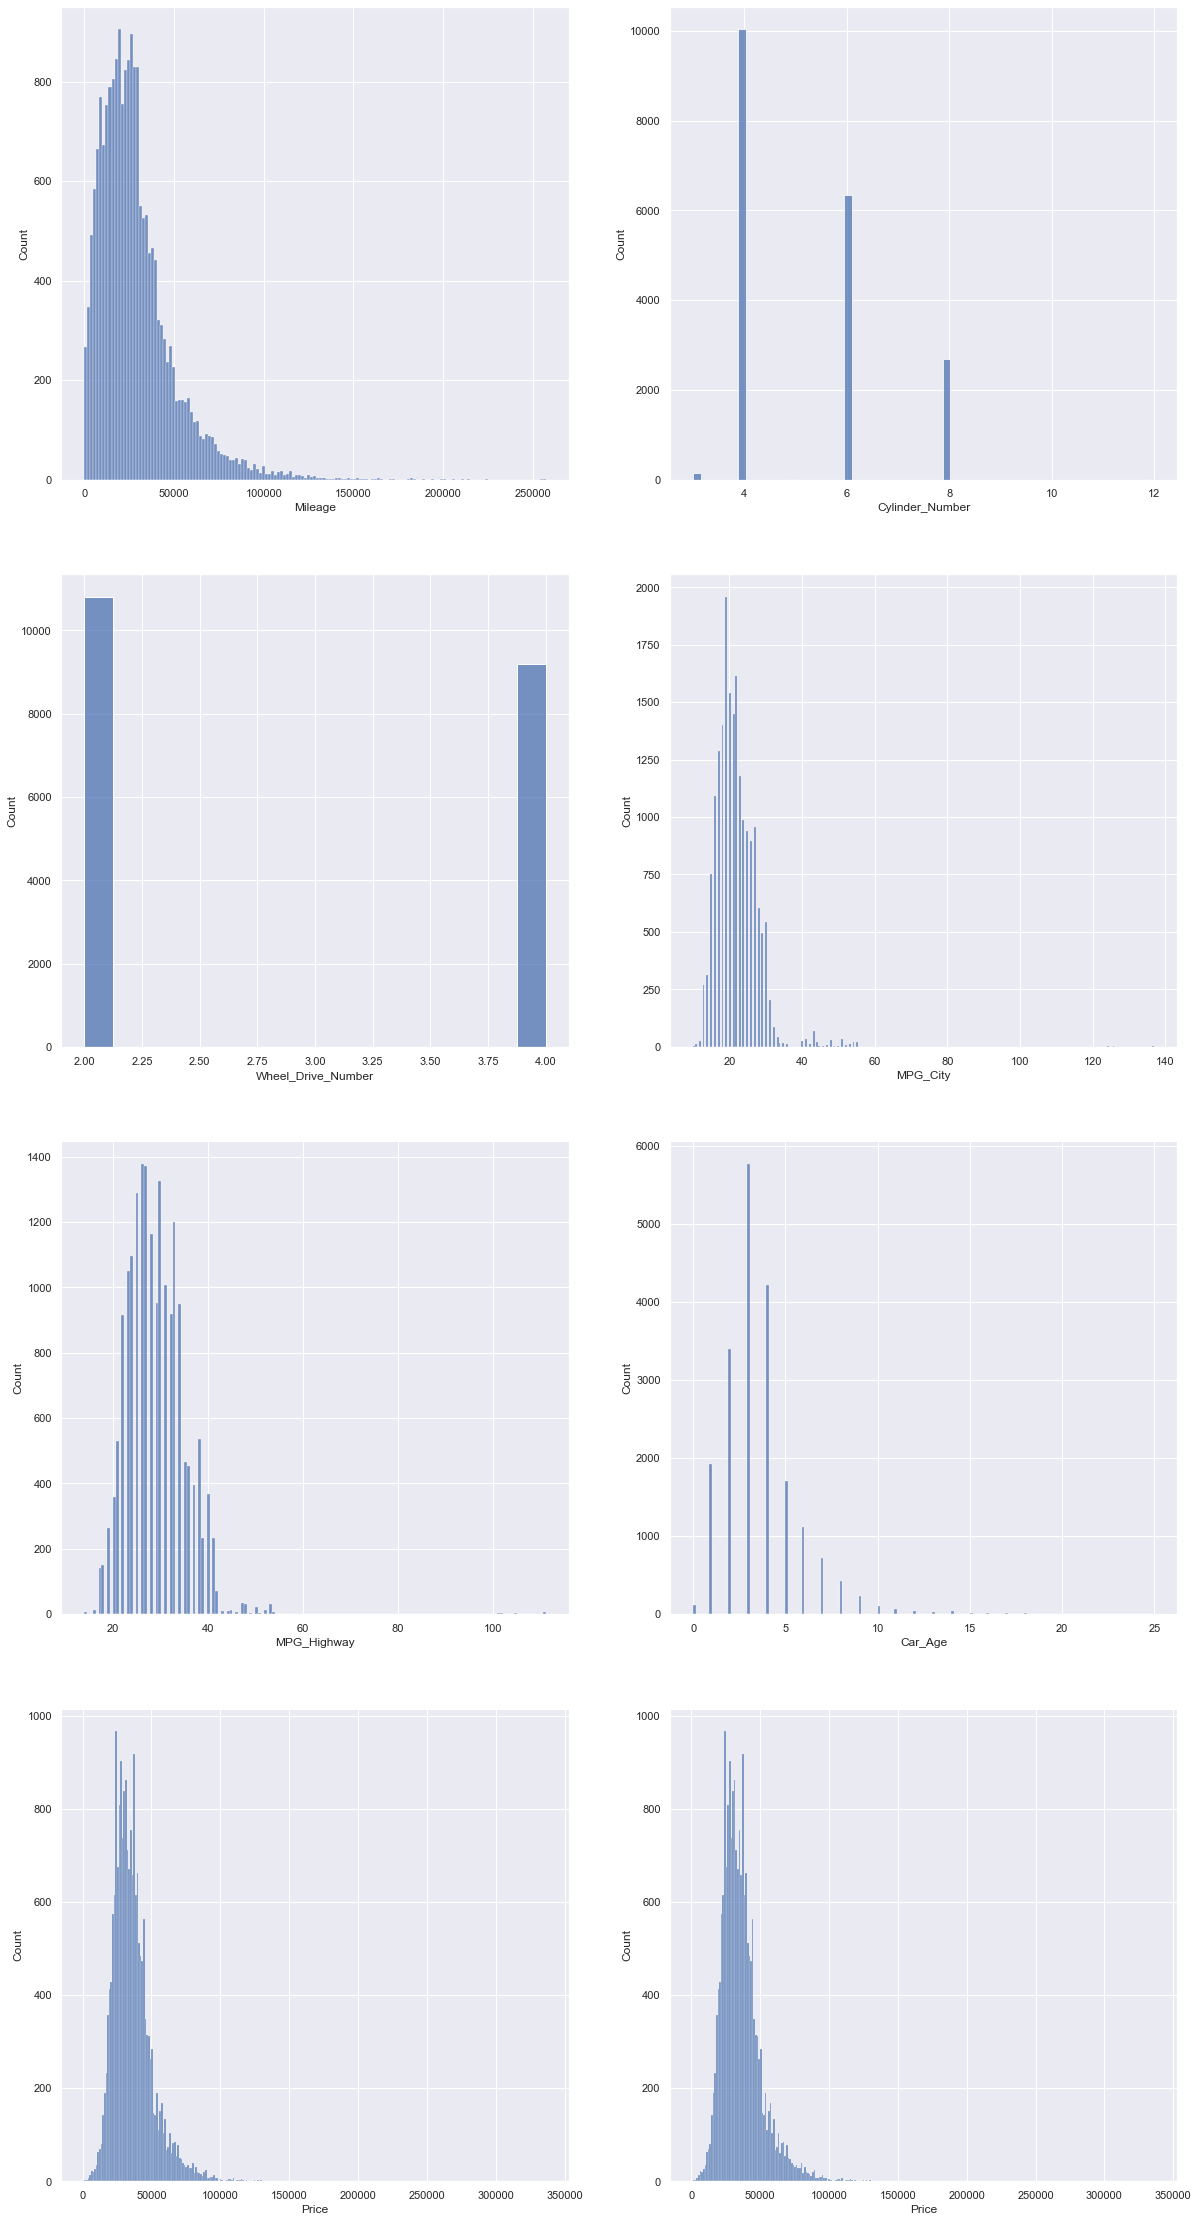

In [22]:
# A great step in the data exploration is to display the probability distribution 
# function (PDF) of a variable. The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=3, figsize=(20, 30))
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(ncols=2, nrows=4, sharey=False, figsize =(20,40))
sns.histplot(formatted_dataset['Mileage'], ax=ax1)
sns.histplot(formatted_dataset['Cylinder_Number'], ax=ax2)
sns.histplot(formatted_dataset['Wheel_Drive_Number'], ax=ax3)
sns.histplot(formatted_dataset['MPG_City'], ax=ax4)
sns.histplot(formatted_dataset['MPG_Highway'], ax=ax5)
sns.histplot(formatted_dataset['Car_Age'], ax=ax6)
sns.histplot(formatted_dataset['Price'], ax=ax7)
sns.histplot(formatted_dataset['Price'], ax=ax8)
plt.show()

### Clean the dataset by removing the outliers

In [23]:
# trim the dataset to remove the outliers
Trim_Dataset(formatted_dataset)

Feature:  Mileage
Initial Min:  5.0  Initial Median:  24576.0  Initial Max:  257047.0
Min Cut:  10  Max Cut:  109347
Data Removed:  186 ( 0.93 %) Total Data Removed:  186 ( 0.93 %)
Low Value Removed:  6  High Value Removed:  180
Final Min:  10.0  Final Median:  24409.0  Final Max:  109327.0


Feature:  Cylinder_Number
Initial Min:  3.0  Initial Median:  4.0  Initial Max:  12.0
Min Cut:  3  Max Cut:  8
Data Removed:  5 ( 0.03 %) Total Data Removed:  191 ( 0.95 %)
Low Value Removed:  0  High Value Removed:  5
Final Min:  3.0  Final Median:  4.0  Final Max:  8.0


Feature:  Wheel_Drive_Number
Initial Min:  2.0  Initial Median:  2.0  Initial Max:  4.0
Min Cut:  2  Max Cut:  4
Data Removed:  0 ( 0.0 %) Total Data Removed:  191 ( 0.95 %)
Low Value Removed:  0  High Value Removed:  0
Final Min:  2.0  Final Median:  2.0  Final Max:  4.0


Feature:  MPG_City
Initial Min:  10.0  Initial Median:  21.0  Initial Max:  137.0
Min Cut:  12  Max Cut:  44
Data Removed:  169 ( 0.84 %) Total Data Removed:

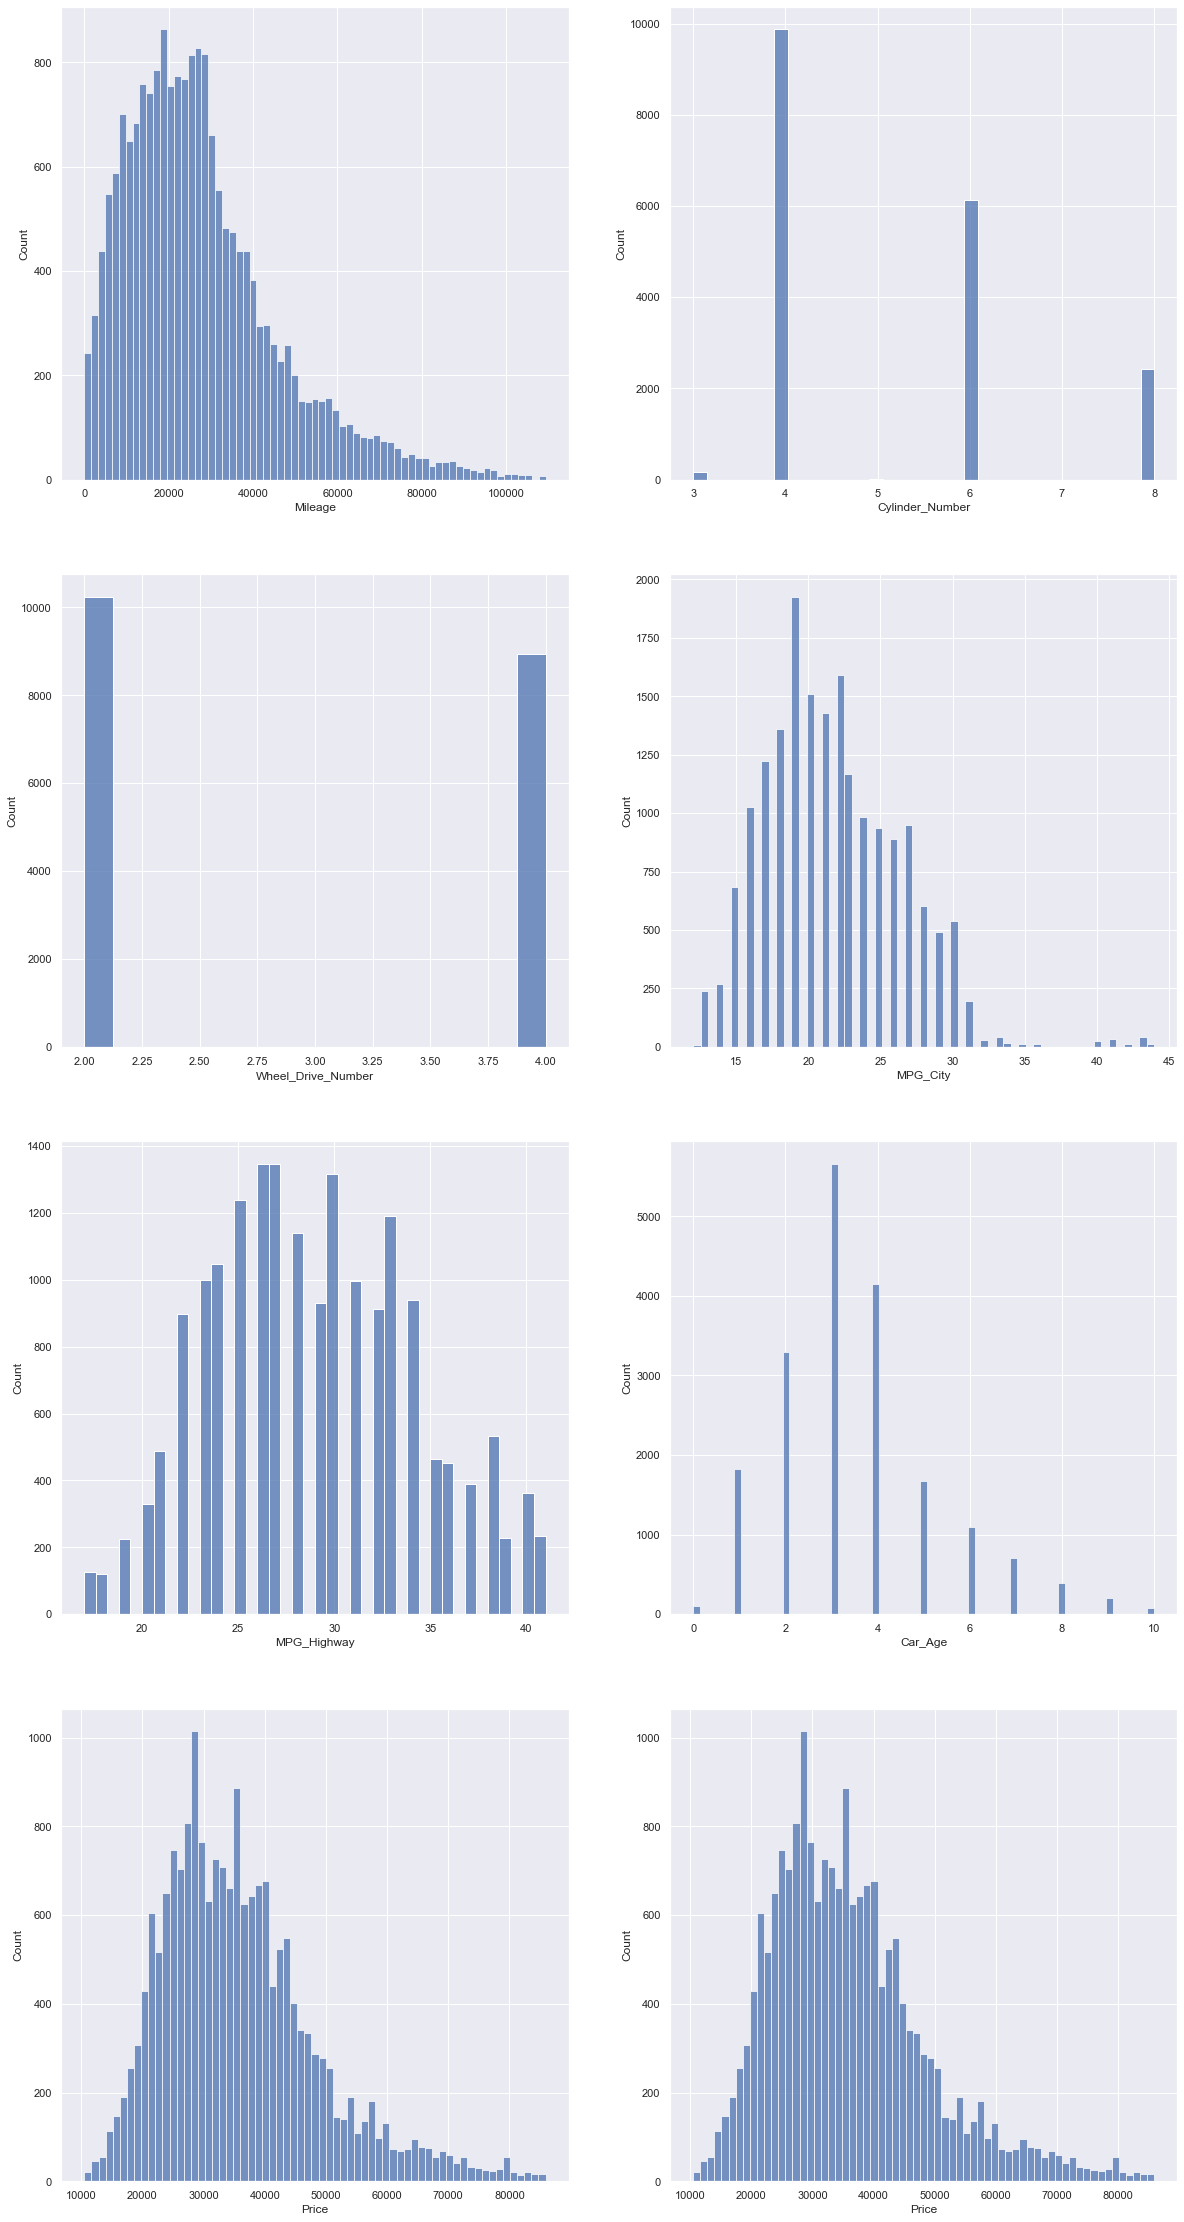

In [24]:
# after removing the outliers, lets check the PDFs again
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=3, figsize=(20, 30))
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(ncols=2, nrows=4, sharey=False, figsize =(20,40))
sns.histplot(formatted_dataset['Mileage'], ax=ax1)
sns.histplot(formatted_dataset['Cylinder_Number'], ax=ax2)
sns.histplot(formatted_dataset['Wheel_Drive_Number'], ax=ax3)
sns.histplot(formatted_dataset['MPG_City'], ax=ax4)
sns.histplot(formatted_dataset['MPG_Highway'], ax=ax5)
sns.histplot(formatted_dataset['Car_Age'], ax=ax6)
sns.histplot(formatted_dataset['Price'], ax=ax7)
sns.histplot(formatted_dataset['Price'], ax=ax8)
plt.show()

In [25]:
Check_Missing_Values(formatted_dataset)

,Missing_Data,Missing_Data (%),Data_Type
Brand,0,0.00,object
Model,0,0.00,object
Body,0,0.00,object
Certification,0,0.00,object
Exterior_Color,396,2.07,object
Interior_Color,760,3.96,object
Transmission_Type,65,0.34,object
Fuel_Type,0,0.00,object
City,0,0.00,object
Zip_Code,0,0.00,object


In [26]:
formatted_dataset.shape

(19173, 17)

## Step-5: Cleaned Dataset

In [27]:
# now lets create cleaned_dataset
cleaned_dataset = formatted_dataset.copy()

In [28]:
cleaned_dataset.shape

(19173, 17)

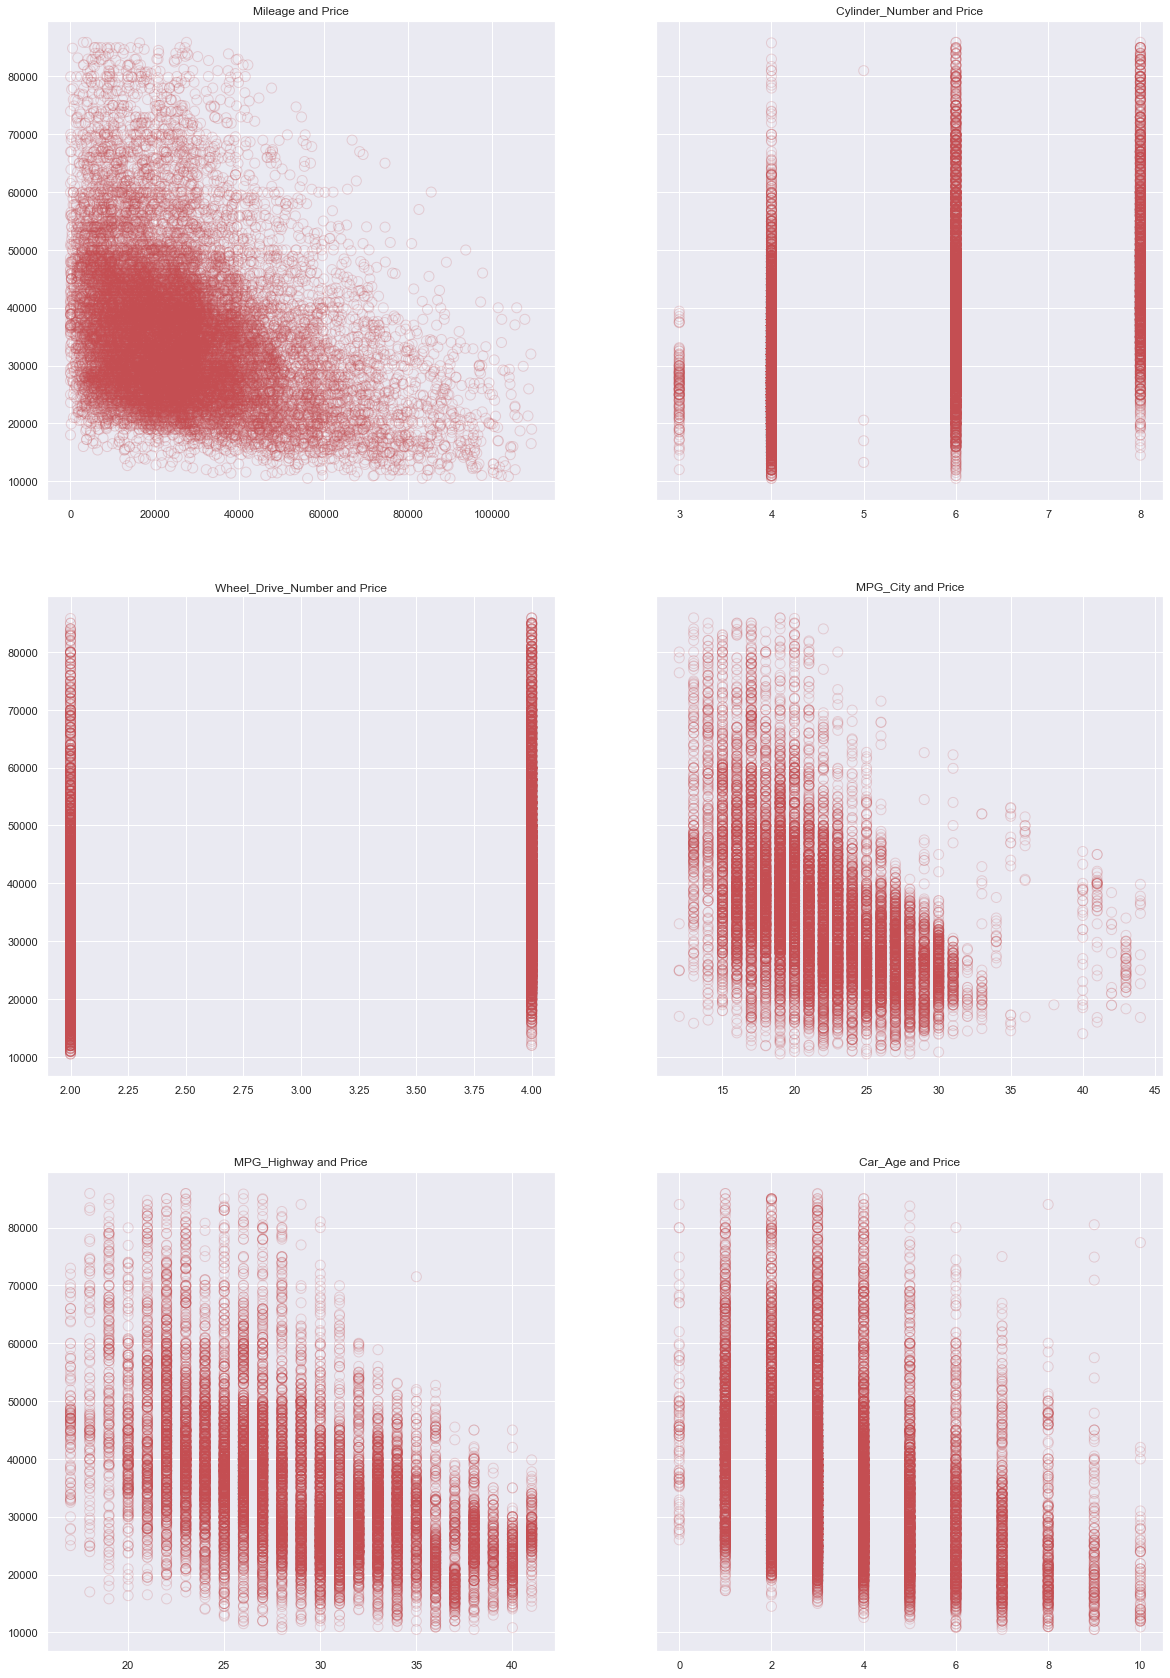

In [29]:
# now let's check the dependence of y with selected features
# since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=3, figsize=(20, 30))
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols=2, nrows=3, sharey=True, figsize =(20,30))
ax1.scatter(cleaned_dataset['Mileage'],cleaned_dataset['Price'], s=100, facecolors='none', edgecolors='r', alpha=0.2)
ax1.set_title('Mileage and Price')
ax2.scatter(cleaned_dataset['Cylinder_Number'],cleaned_dataset['Price'], s=100, facecolors='none', edgecolors='r', alpha=0.2)
ax2.set_title('Cylinder_Number and Price')
ax3.scatter(cleaned_dataset['Wheel_Drive_Number'],cleaned_dataset['Price'], s=100, facecolors='none', edgecolors='r', alpha=0.2)
ax3.set_title('Wheel_Drive_Number and Price')
ax4.scatter(cleaned_dataset['MPG_City'],cleaned_dataset['Price'], s=100, facecolors='none', edgecolors='r', alpha=0.2)
ax4.set_title('MPG_City and Price')
ax5.scatter(cleaned_dataset['MPG_Highway'],cleaned_dataset['Price'], s=100, facecolors='none', edgecolors='r', alpha=0.2)
ax5.set_title('MPG_Highway and Price')
ax6.scatter(cleaned_dataset['Car_Age'],cleaned_dataset['Price'], s=100, facecolors='none', edgecolors='r', alpha=0.2)
ax6.set_title('Car_Age and Price')
plt.show()


## Step-6: Export Cleaned Dataset

In [30]:
cleaned_dataset.describe(include='all')

,Brand,Model,Body,Certification,Exterior_Color,Interior_Color,Transmission_Type,Fuel_Type,City,Zip_Code,Mileage,Cylinder_Number,Wheel_Drive_Number,MPG_City,MPG_Highway,Car_Age,Price
count,19173,19173,19173,19173,18777,18413,19108,19173,19173,19173,19162.000000,18599.000000,19170.000000,18255.000000,18255.000000,19173.000000,19173.000000
unique,36,492,8,2,18,970,3,6,34,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,RAV4,SUV,Used,Black,Black,Automatic,Gasoline,New York,85014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1997,472,9193,14465,4312,7317,18362,17775,781,347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27672.458407,5.174687,2.931351,21.671871,28.789592,3.521723,35888.852605
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18411.465336,1.428653,0.997667,4.645199,5.338425,1.752829,12871.216139
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,3.000000,2.000000,12.000000,17.000000,0.000000,10498.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14422.500000,4.000000,2.000000,18.000000,25.000000,2.000000,26763.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24426.000000,4.000000,2.000000,21.000000,28.000000,3.000000,33988.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36404.750000,6.000000,4.000000,25.000000,33.000000,4.000000,42490.000000


In [35]:
# check feature details
Check_Feature_Details(cleaned_dataset, 'Brand')

['Toyota' 'Ford' 'Chevrolet' 'Lexus' 'GMC' 'Dodge' 'Cadillac' 'Nissan'
 'RAM' 'Jeep' 'Tesla' 'Honda' 'Volkswagen' 'Porsche' 'Hyundai'
 'Mitsubishi' 'MAZDA' 'Subaru' 'Mercedes-Benz' 'Buick' 'BMW' 'INFINITI'
 'Acura' 'Kia' 'Audi' 'Lincoln' 'Chrysler' 'Maserati' 'Land Rover' 'Volvo'
 'Genesis' 'MINI' 'Jaguar' 'FIAT' 'Scion' 'Alfa Romeo']


,Value_Counts,Value_Counts (%)
Ford,1997,10.42
Toyota,1985,10.35
Honda,1658,8.65
Chevrolet,1550,8.08
BMW,1350,7.04
Mercedes-Benz,1067,5.57
Nissan,1056,5.51
Jeep,938,4.89
Lexus,725,3.78
Hyundai,659,3.44


### Export cleaned data to XLSX and CSV file

In [32]:
cleaned_dataset.to_excel('Cleaned_Dataset.xlsx', index=False)

In [33]:
cleaned_dataset.to_csv('Cleaned_Dataset.csv', index=False)

### Export cleaned data to PostgreSQL

In [34]:
# now cleaned_dataset will be exported to PostgreSQL table 
try:
    cleaned_dataset.to_sql('Cleaned_Dataset', engine, if_exists= 'replace', index= False)
    print('Data uploaded to PostgreSQL table')

except:
    print("Sorry, some error has occurred!")

finally:
    engine.dispose()

Data uploaded to PostgreSQL table
